# Práctica 3: Resolución Numérica  de PVIs  usando Python

Autor: José Alberto Hoces Castro

3º Doble Grado en Ingeniería Informática y Matemáticas

## Ejercicios

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline
from time import perf_counter as now

1. Repita las aproximaciones anteriores con diferentes valores de $N$ (y por tanto de $h$) y compruebe el efecto en cuanto a mayor o menor precisión, estabilidad y coste computacional 

Tenemos que comenzar definiendo el PVI que aparece al principio de la práctica:

$$
    x' = f(t,x) = x, \quad x(0) = 1, \quad t \in [0,1]
$$

In [5]:
t, y0, z = sp.symbols('t, y_0,  z')
def f(t,z):
    return z

In [6]:
a = 0; b = 1;   # extremos inferior y superior del intervalo 
ya = 1          # condición inicial del PVI

Partimos de $N=10$ y hacemos incrementos de 10 unidades, es decir, $N = 10 + 10i, i= 0,1,...,6$. Guardaremos todos nuestros datos en arrays para mostrar los datos. Tendremos una matriz `y`, donde `y[i][metodo]` corresponderá con las aproximaciones con $N= 10 + 10i$ para el método especificado. Los tiempos de ejecución (para la comparativa computacional) los guardaremos en un vector `tiempo`, donde `tiempo[i][metodo]` corresponderá al tiempo de ejecución con $N = 10 + 10i$ para el método especificado.

Definimos `comparacion_metodos()`. El argumento `*args` será un vector de argumentos para la función `integrate` de cada uno de los métodos.

In [7]:
def comparacion_metodos(metodos, iters, *args):
    ''' Función para comparar métodos dados como argumentos
    Argumentos:
        - metodos: array de strings con los métodos a comparar
        - iters: número de iteraciones que queremos realizar
        - *args: parámetros para la función integrate de nuestros metodos
    '''

    x = []
    y = []
    metodos = list(dict.fromkeys(metodos)) #Eliminamos los posibles metodos repetidos
    tiempo = []

    print("Iniciando la comparación de los siguientes métodos:")
    for elemento in metodos:
        print("\t-", elemento)
    print("\n")
    
    print("Ejecutando {} iteraciones de valores de N...\n|".format(iters))

    for i in range(iters):
        N = 10+10*i
        
        if i == iters - 1:
            print('└', end=" ")
        else:
            print('├', end=" ")

        print("Calculando resultados para i={}, N={}".format(i, N))

        _y, _t = {}, {} #Usaremos diccionarios

        for metodo in metodos:
            module = __import__(metodo) # Importamos los métodos segun los usamos
            integral = getattr(module, "integrate") # Usamos la función integrate del módulo recién importado

            # Cronometramos el tiempo de ejecución
            t0 = now()
            _x, _y[metodo] = integral(*args, N=N) # Le pasamos los argumentos a la función integral
            t1 = now()

            if i == iters - 1:
                print(' ', end=" ")
            else:
                print('│', end = " ")
            
            if metodo == metodos[-1]:
                print('└', end = " ")
            else:
                print('├', end = " ")

            print("Finalizado el método \'{}\'".format(metodo))

            
            if i == iters - 1:
                print(' ', end= " ")
            else:
                print('│', end=" ")
            
            if metodo == metodos[-1]:
                print(' ', end = " ")
            else:
                print('│', end = " ")
                
            print("Tiempo de ejecución: {}".format(t1 - t0))
            

            _t[metodo] = t1 - t0
        
        print('│')

        x.append(_x)
        y.append(_y)
        tiempo.append(_t)

    print("\nEjecución realiza con éxito")

    return x, y, tiempo

Y usamos nuestra función:

In [8]:
metodos = ["eulerexplicito", "eulerimplicito", "eulerimplicitoaprox"]
x, y, tiempos = comparacion_metodos(metodos, 6, f, a, ya, b)

Iniciando la comparación de los siguientes métodos:
	- eulerexplicito
	- eulerimplicito
	- eulerimplicitoaprox


Ejecutando 6 iteraciones de valores de N...
|
├ Calculando resultados para i=0, N=10
│ ├ Finalizado el método 'eulerexplicito'
│ │ Tiempo de ejecución: 0.0009140999998180632
│ ├ Finalizado el método 'eulerimplicito'
│ │ Tiempo de ejecución: 0.5380954999998266
│ └ Finalizado el método 'eulerimplicitoaprox'
│   Tiempo de ejecución: 0.00040510000007998315
│
├ Calculando resultados para i=1, N=20
│ ├ Finalizado el método 'eulerexplicito'
│ │ Tiempo de ejecución: 0.00016009999990274082
│ ├ Finalizado el método 'eulerimplicito'
│ │ Tiempo de ejecución: 1.240257100000008
│ └ Finalizado el método 'eulerimplicitoaprox'
│   Tiempo de ejecución: 0.00040669999998499407
│
├ Calculando resultados para i=2, N=30
│ ├ Finalizado el método 'eulerexplicito'
│ │ Tiempo de ejecución: 0.0002058000000033644
│ ├ Finalizado el método 'eulerimplicito'
│ │ Tiempo de ejecución: 2.0138675000000603
│ └ F

A continuación comparamos la calidad de nuestras aproximaciones haciendo uso de `x`, `y` y `tiempos`

Text(0.5, 1.0, 'Aproximaciones')

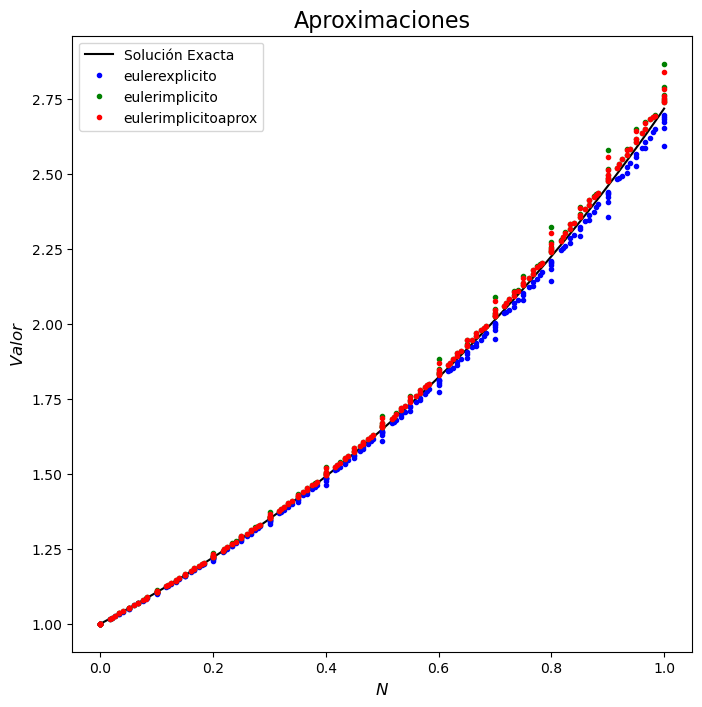

In [9]:
fig, ax = plt.subplots(figsize=(8,8))
xx = np.linspace(a,b,100)
yy = [np.exp(x) for x in xx] #la funcion es la exponencial
colors = 'bgr'
ax.plot(xx, yy, 'k', label="Solución Exacta")

for metodo in metodos:
    ax.plot(x[0], y[0][metodo], colors[metodos.index(metodo)]+'.', label=metodo)
    for i in range(1,6):
        ax.plot(x[i],y[i][metodo], colors[metodos.index(metodo)]+'.')

ax.legend(loc="upper left")
ax.set_xlabel("$N$", fontsize=12)
ax.set_ylabel("$Valor$", fontsize=12)
ax.set_title('Aproximaciones', fontsize=16)

Aunque los tres métodos se acercan mucho a la solución exacta, se puede apreciar que Euler implícito es el que más dista de la solución exacta, y el que más se acerca es Euler implícito aproximado. Para visualizarlo mejor, vamos a graficar los errores en valor absoluto de los tres métodos:

Text(0.5, 1.0, 'Máximos errores absoluto')

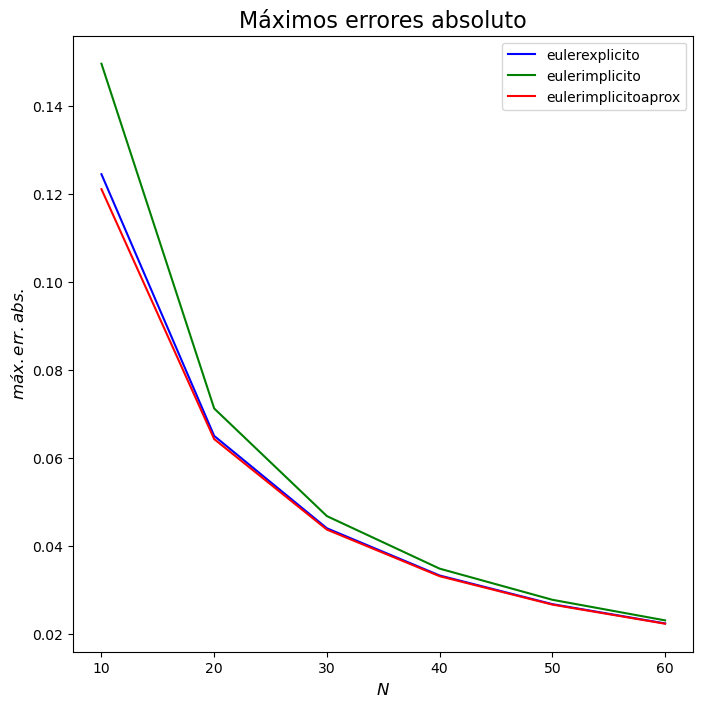

In [10]:
nv = [10 + 10*i for i in range(6)]

fig, ax = plt.subplots(figsize=(8,8))
color = "bgr"

for metodo in metodos:
    ax.plot(nv,[abs([np.exp(p) for p in x[i]] - y[i][metodo]).max() for i in range(6)], colors[metodos.index(metodo)], label=metodo)

ax.legend(loc="upper right")
ax.set_xlabel('$N$', fontsize=12)
ax.set_ylabel('$máx.err.abs.$', fontsize=12)
ax.set_title("Máximos errores absoluto", fontsize=16)

Terminamos comparando los tiempos de ejecución:

Text(0.5, 1.0, 'Tiempos de ejecución')

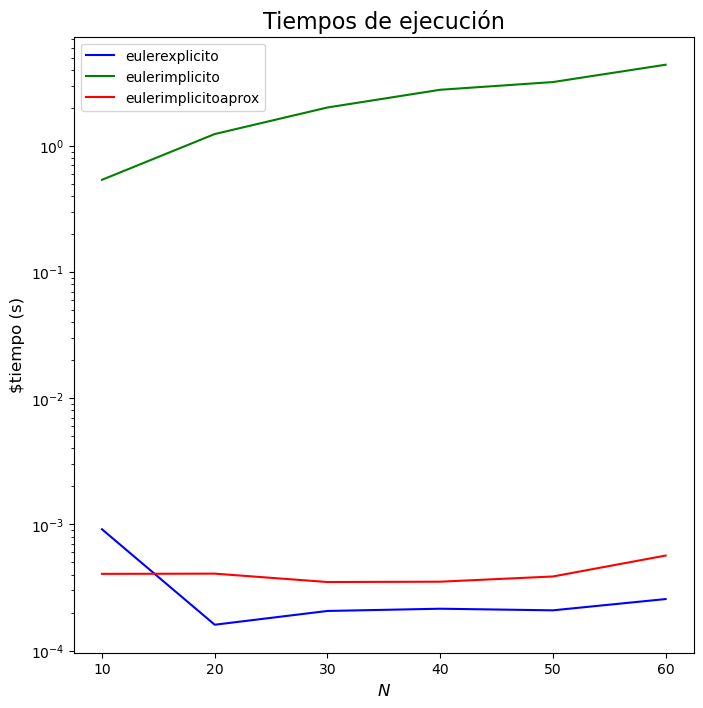

In [11]:
fig, ax = plt.subplots(figsize=(8,8))
color = "bgr"

for metodo in metodos:
    ax.plot(nv, [tiempos[i][metodo] for i in range(6)], colors[metodos.index(metodo)], label=metodo)

ax.set_yscale("log") #Usamos la escala logaritmica
ax.legend(loc="upper left")
ax.set_xlabel('$N$', fontsize=12)
ax.set_ylabel("$tiempo (s)", fontsize=12)
ax.set_title("Tiempos de ejecución", fontsize=16)

Concluimos que en cuanto a coste computacional, Euler implícito es el que más tarda. El más eficiente sería Euler explícito, seguido muy de cerca por Euler implícito aproximado. En cuanto a la precisión, vemos que el más exacto es Euler explícito, muy seguido de cerca por Euler implícito aproximado y siendo Euler implícito el menos preciso. De todas formas, hemos visto que para valores grandes de $N$, los tres métodos obtienen aproximaciones muy precisas.

2. A partir de la implementación del algoritmo del método de Euler explícito, realice las modificaciones oportunas para obtener también las implementaciones correspondientes a los métodos de Euler mejorado (o del punto medio), así como del de Euler modificado (o de Heun).

Para obtener dichas implementaciones, copiamos el método de Euler explícito y realizamos las modificaciones oportunas

In [12]:
%%file eulermejorado.py
## módulo eulermejorado

import numpy as np
def integrate(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    for n in range(N):
        Y.append(Y[n] + h*F(X[n] + h/2,Y[n] + (h/2)*F(X[n],Y[n])))
    return np.array(X),np.array(Y)

Overwriting eulermejorado.py


In [13]:
%%file   eulermodificado.py
## módulo eulermodificado

import numpy as np
def integrate(F,x0,y0,xfinal,N):
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    for n in range(N):
        Y.append(Y[n] + (h/2)*(F(X[n],Y[n])+F(X[n+1],Y[n]+h*F(X[n],Y[n]))))
    return np.array(X),np.array(Y)

Overwriting eulermodificado.py


3. Realice varios experimentos numéricos, con diferentes valores de $N$, y compare y ratifique los órdenes de convergencia de los diferentes métodos vistos hasta el momento.

Hasta ahora hemos visto 6 métodos, concretamente Euler implícito, Euler explícito, Euler implícito aproximado, Euler modificado, Euler mejorado y Taylor de orden 2.  Procedemos a definir el vector con los nombres de los métodos:

In [14]:
metodos = ["eulerexplicito", "eulerimplicito", "eulerimplicitoaprox", "eulermejorado", "eulermodificado", "Taylor2"]

Y hacemos uso de la función comparadora que hemos creado en el ejercicio 1:

In [15]:
x, y, tiempos = comparacion_metodos(metodos, 6, f, a, ya, b)

Iniciando la comparación de los siguientes métodos:
	- eulerexplicito
	- eulerimplicito
	- eulerimplicitoaprox
	- eulermejorado
	- eulermodificado
	- Taylor2


Ejecutando 6 iteraciones de valores de N...
|
├ Calculando resultados para i=0, N=10
│ ├ Finalizado el método 'eulerexplicito'
│ │ Tiempo de ejecución: 0.0003191000000697386
│ ├ Finalizado el método 'eulerimplicito'
│ │ Tiempo de ejecución: 0.4585658999999396
│ ├ Finalizado el método 'eulerimplicitoaprox'
│ │ Tiempo de ejecución: 0.00029949999998279964
│ ├ Finalizado el método 'eulermejorado'
│ │ Tiempo de ejecución: 0.00035410000009505893
│ ├ Finalizado el método 'eulermodificado'
│ │ Tiempo de ejecución: 0.000390200000083496
│ └ Finalizado el método 'Taylor2'
│   Tiempo de ejecución: 0.024831799999901705
│
├ Calculando resultados para i=1, N=20
│ ├ Finalizado el método 'eulerexplicito'
│ │ Tiempo de ejecución: 0.0002457999999023741
│ ├ Finalizado el método 'eulerimplicito'
│ │ Tiempo de ejecución: 1.2316819000000123
│ ├ Finali

Y procedemos a realizar las comparaciones de las aproximaciones y los tiempos tal y como se hizo en el ejercicio 1, solo que ahora usaremos más colores

Text(0.5, 1.0, 'Aproximaciones')

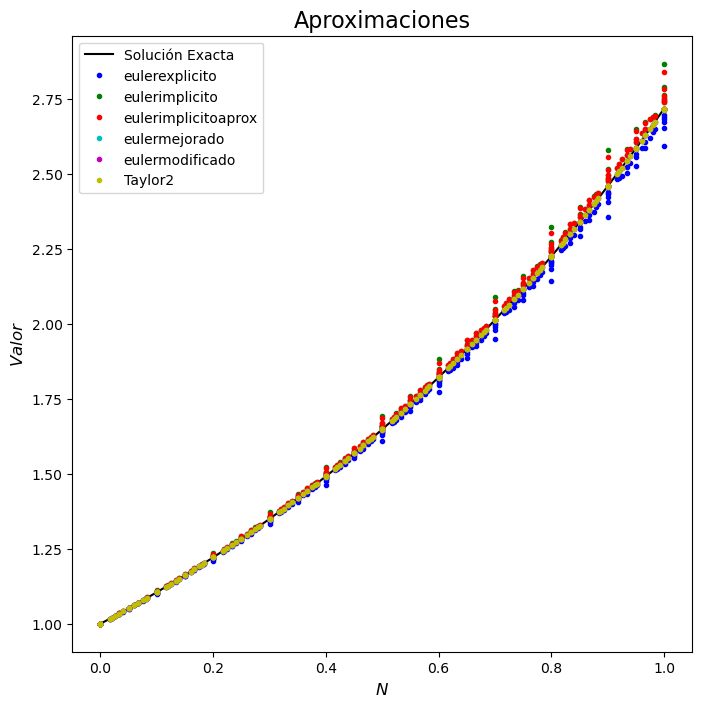

In [16]:
fig, ax = plt.subplots(figsize=(8,8))
xx = np.linspace(a,b,100)
yy = [np.exp(x) for x in xx] #la funcion es la exponencial
colors = 'bgrcmy'
ax.plot(xx, yy, 'k', label="Solución Exacta")

for metodo in metodos:
    ax.plot(x[0], y[0][metodo], colors[metodos.index(metodo)]+'.', label=metodo)
    for i in range(1,6):
        ax.plot(x[i],y[i][metodo], colors[metodos.index(metodo)]+'.')

ax.legend(loc="upper left")
ax.set_xlabel("$N$", fontsize=12)
ax.set_ylabel("$Valor$", fontsize=12)
ax.set_title('Aproximaciones', fontsize=16)

Text(0.5, 1.0, 'Máximos errores absoluto')

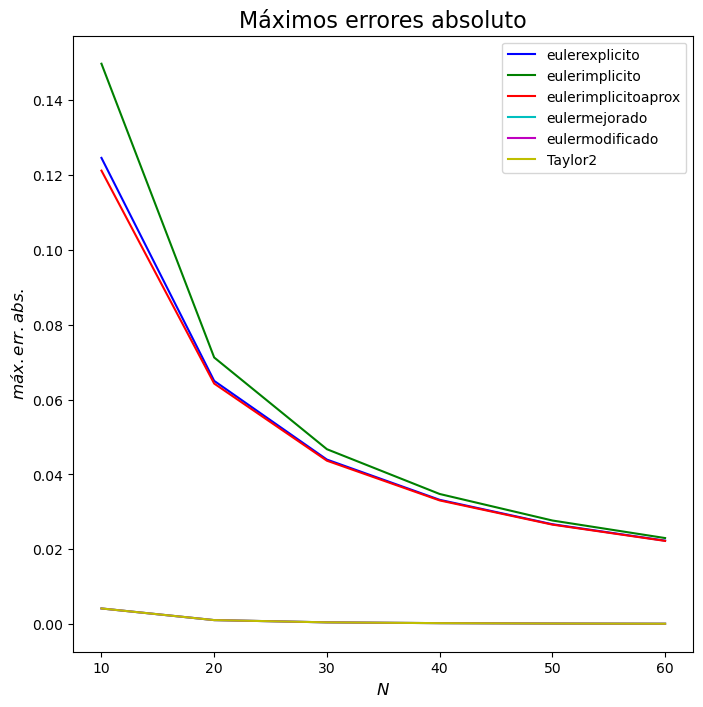

In [17]:
nv = [10 + 10*i for i in range(6)]

fig, ax = plt.subplots(figsize=(8,8))
color = "bgrcmy"

for metodo in metodos:
    ax.plot(nv,[abs([np.exp(p) for p in x[i]] - y[i][metodo]).max() for i in range(6)], colors[metodos.index(metodo)], label=metodo)

ax.legend(loc="upper right")
ax.set_xlabel('$N$', fontsize=12)
ax.set_ylabel('$máx.err.abs.$', fontsize=12)
ax.set_title("Máximos errores absoluto", fontsize=16)

Text(0.5, 1.0, 'Tiempos de ejecución')

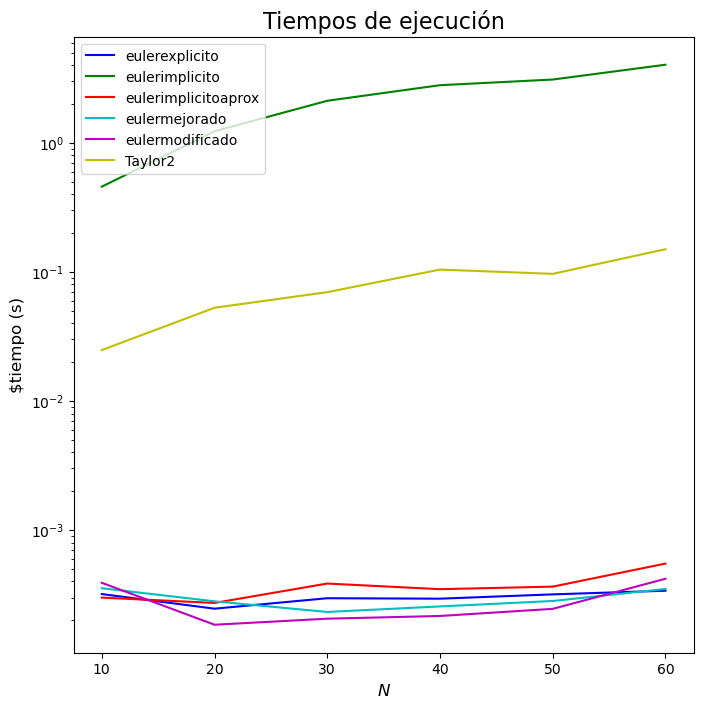

In [18]:
fig, ax = plt.subplots(figsize=(8,8))
color = "bgrcmy"

for metodo in metodos:
    ax.plot(nv, [tiempos[i][metodo] for i in range(6)], colors[metodos.index(metodo)], label=metodo)

ax.set_yscale("log") #Usamos la escala logaritmica
ax.legend(loc="upper left")
ax.set_xlabel('$N$', fontsize=12)
ax.set_ylabel("$tiempo (s)", fontsize=12)
ax.set_title("Tiempos de ejecución", fontsize=16)

A la ista de las gráficas, está claro que el método que realiza una mejor aproximación es Taylor de orden 2. Esto es lógico, ya que es el método de mayor orden entre los usados. Sin embargo, en cuanto a eficiencia, salvo Euler implícito, el resto de métodos tienen un menor coste computacional que Taylor de orden 2. Es decir, estamos ganando precisión a cambio de perder coste computacional.

4. A partir de la implementación del algoritmo del método de Taylor de orden $p=2$, realice las modificaciones oportunas para obtener también una posible implementación correspondiente al método de Taylor de orden $p=3$.

In [19]:
%%file Taylor3.py
## módulo Taylor3
''' método del método de Taylor de orden 3 para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales 
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve 
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
def integrate(F,x0,y0,xfinal,N):  
    import numpy as np
    import sympy as sp
    
    t, z = sp.symbols('t, z')
    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    
    def F1(t,z):
        return F(t,z)

    def F2(t,z):
        return sp.diff(F(t,z),t) + sp.diff(F(t,z),z)*F1(t,z)
    
    def F3(t,z):
        return sp.diff(F2(t,z),t) + sp.diff(F2(t,z),z)*F1(t,z)
    
    for n in range(N):
        Y.append(Y[n]+h*F1(X[n],Y[n]) + h**2/2*F2(t,z).subs({t:X[n], z:Y[n]}) + h**3/6*F3(t,z).subs({t:X[n], z:Y[n]}))
    return np.array(X),np.array(Y)

Overwriting Taylor3.py


5. Repita las aproximaciones anteriores con diferentes valores de $N$ (y por tanto de $h$) y compruebe el efecto en cuanto a mayor o menor precisión, estabilidad y coste computacional 

Tendremos que realizar aproximaciones con los métodos Euler implícito, Euler explícito, Euler implícito aproximado, Euler mejorado, Euler modificado, Taylor de orden 2, Taylor de orden 3 y Runge-Kutta de orden 4. Por ello, definimos el vector con el nombre de todos los métodos:

In [20]:
metodos = ["eulerexplicito", "eulerimplicito", "eulerimplicitoaprox", "eulermejorado", "eulermodificado", "Taylor2", "Taylor3", "RK4"]

Y empleamos la función creada en el ejercicio 1 para obtener las aproximaciones y los tiempos como venimos haciendo hasta ahora:

In [21]:
x, y, tiempos = comparacion_metodos(metodos, 6, f, a, ya, b)

Iniciando la comparación de los siguientes métodos:
	- eulerexplicito
	- eulerimplicito
	- eulerimplicitoaprox
	- eulermejorado
	- eulermodificado
	- Taylor2
	- Taylor3
	- RK4


Ejecutando 6 iteraciones de valores de N...
|
├ Calculando resultados para i=0, N=10
│ ├ Finalizado el método 'eulerexplicito'
│ │ Tiempo de ejecución: 0.0004805999999462074
│ ├ Finalizado el método 'eulerimplicito'
│ │ Tiempo de ejecución: 0.4516360000000077
│ ├ Finalizado el método 'eulerimplicitoaprox'
│ │ Tiempo de ejecución: 0.00034329999994042737
│ ├ Finalizado el método 'eulermejorado'
│ │ Tiempo de ejecución: 0.00017679999996289553
│ ├ Finalizado el método 'eulermodificado'
│ │ Tiempo de ejecución: 0.00013229999990471697
│ ├ Finalizado el método 'Taylor2'
│ │ Tiempo de ejecución: 0.02688280000006671
│ ├ Finalizado el método 'Taylor3'
│ │ Tiempo de ejecución: 0.043159699999932855
│ └ Finalizado el método 'RK4'
│   Tiempo de ejecución: 0.00032000000010157237
│
├ Calculando resultados para i=1, N=20
│ ├ Fi

Y graficamos las aproximaciones, sus máximos errores en valor absoluto y los tiempos empleados

Text(0.5, 1.0, 'Aproximaciones')

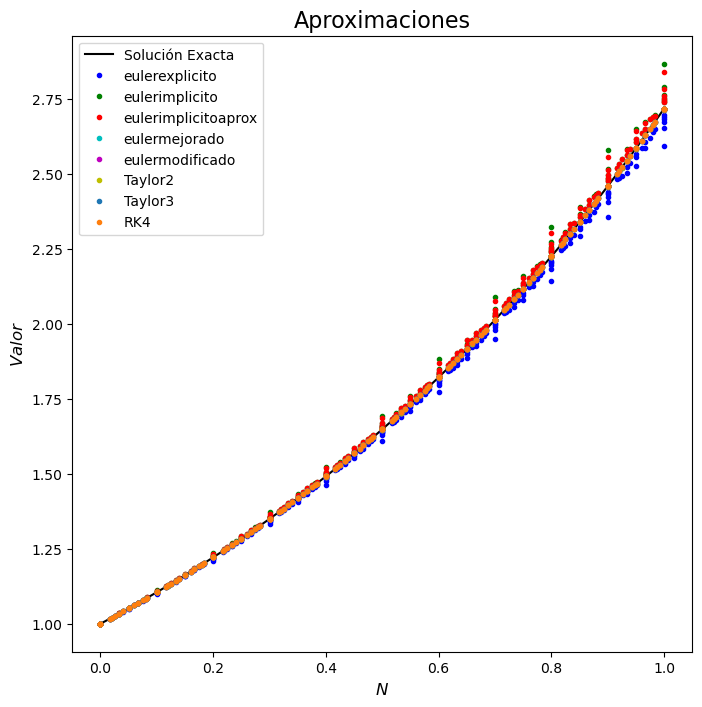

In [22]:
fig, ax = plt.subplots(figsize=(8,8))
xx = np.linspace(a,b,100)
yy = [np.exp(x) for x in xx] #la funcion es la exponencial
colors = ['b','g','r','c','m','y','C0','C1']
ax.plot(xx, yy, 'k', label="Solución Exacta")

for metodo in metodos:
    ax.plot(x[0], y[0][metodo], colors[metodos.index(metodo)]+'.', label=metodo)
    for i in range(1,6):
        ax.plot(x[i],y[i][metodo], colors[metodos.index(metodo)]+'.')

ax.legend(loc="upper left")
ax.set_xlabel("$N$", fontsize=12)
ax.set_ylabel("$Valor$", fontsize=12)
ax.set_title('Aproximaciones', fontsize=16)

Text(0.5, 1.0, 'Máximos errores absoluto')

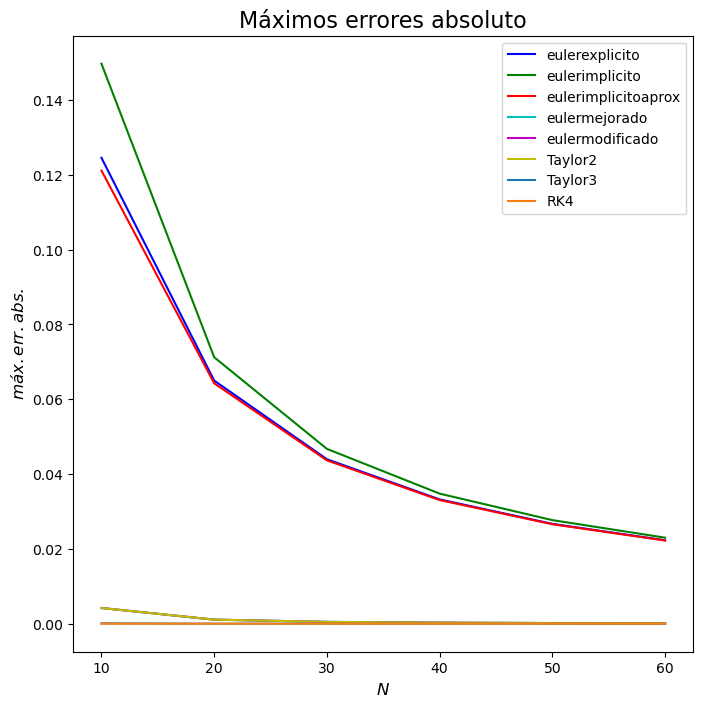

In [23]:
nv = [10 + 10*i for i in range(6)]

fig, ax = plt.subplots(figsize=(8,8))
colors = ['b','g','r','c','m','y','C0','C1']

for metodo in metodos:
    ax.plot(nv,[abs([np.exp(p) for p in x[i]] - y[i][metodo]).max() for i in range(6)], colors[metodos.index(metodo)], label=metodo)

ax.legend(loc="upper right")
ax.set_xlabel('$N$', fontsize=12)
ax.set_ylabel('$máx.err.abs.$', fontsize=12)
ax.set_title("Máximos errores absoluto", fontsize=16)

Text(0.5, 1.0, 'Tiempos de ejecución')

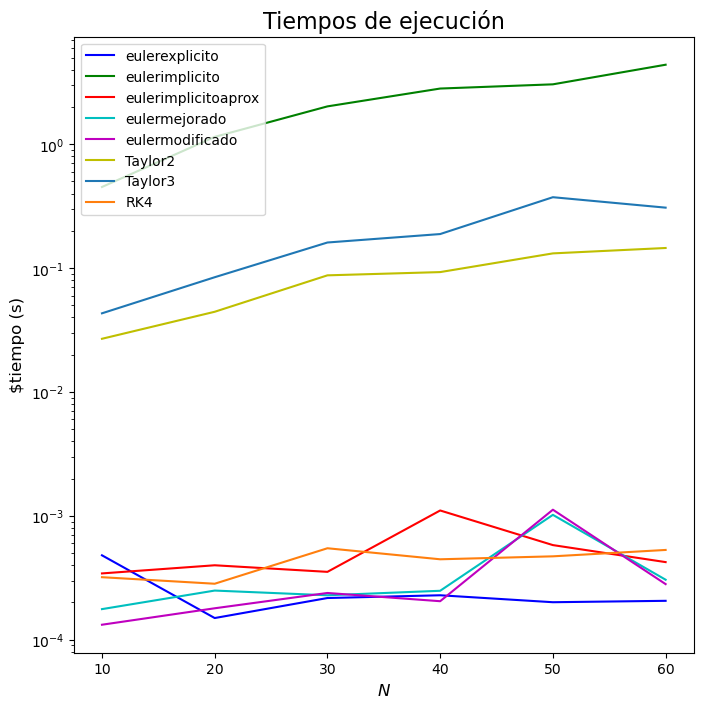

In [24]:
fig, ax = plt.subplots(figsize=(8,8))
colors = ['b','g','r','c','m','y','C0','C1']

for metodo in metodos:
    ax.plot(nv, [tiempos[i][metodo] for i in range(6)], colors[metodos.index(metodo)], label=metodo)

ax.set_yscale("log") #Usamos la escala logaritmica
ax.legend(loc="upper left")
ax.set_xlabel('$N$', fontsize=12)
ax.set_ylabel("$tiempo (s)", fontsize=12)
ax.set_title("Tiempos de ejecución", fontsize=16)

Podemos ver que RK4 es el método de mayor orden ya que es el que menor error comete, y además tiene un coste computacional aproximado al de Euler explícito, Euler mejorado, Euler modificado y Euler implícito aproximado. Por último, cabe destacar que Euler implícito es el de mayor coste computacional y los métodos de Taylor son considerablemente más costosos que los 5 mencionados anteriormente.

6. A partir de la implementación del algoritmo del método de Runge-Kutta de 4 evaluaciones, realice las modificaciones oportunas para intentar obtener también las implementaciones correspondientes a otros muchos métodos de tipo Runge-Kutta, tanto explícitos como implícitos, a partir del correspondiente arreglo de Butcher. 

El arreglo de Butcher determina cualquier método de Runge-Kutta. Por ello, vamos a crear un módulo con el que calcular cualquier método de Runge-Kutta.

En este módulo habrá una función `integrate` y una función `Butcher` para poder manejar los arreglos de Butcher. Antes de continuar, he de comentar que varios compañeros hemos estado tratando de implementar RK implícito pero nos ha sido imposible. Al buscar un poco por Internet, nos hemos dado cuenta de que es un tema bastante complejo. Por ello, en el código distinguimos cuándo es un método implícito y en ese caso, no se devuelve nada

In [25]:
%%file rk.py
# módulo rk

class Butcher: #clase para los arreglos de Butcher
    def __init__(self,a,b,c): #Constructor
        self.a = a
        self.b = b
        self.c = c

    def __repr__(self): #Representacion
        s = ''
        for i in range(len(self.a)):
            s += "{: >6} │ ".format(str(self.c[i])[:6])
            for j in range(len(self.a)):
                s += "{: >6} ".format(str(self.a[i][j])[:6])
            s += '\n'
        s += "───────┼─"
        for i in range(len(self.a)):
            s += "───────"
        s += "\n       │ "
        for i in range(len(self.a)):
            s += "{: >6} ".format(str(self.b[i])[:6])
        return s

    @classmethod #Decorator para metodo de clase
    def create_matrix(self, matrix):
        a = []
        b = []
        c = []

        for i in range(len(matrix)-1):
            c.append(matrix[i][0])
            b.append(matrix[len(matrix)-1][i+1])
            v = []

            for j in range(len(matrix)-1):
                v.append(matrix[i][j+1])
            a.append(v)
        return Butcher(a,b,c)

    def is_explicit(self):
        explicit = True
        for i in range(len(self.a)):
            for j in range(i+1, len(self.a)):
                if self.a[i][j] != 0:
                    explicit = False
        return explicit


''' método Runge-Kutta explícito para resolver el PVI a partir de un arreglo de Butcher dado
    X, Y    = integrate(F,x0,y0,xfinal,N)
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...,y[N-1]}
    x0,y0   = condiciones iniciales
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función dada por el usuario que devuelve el 
            array F(x,y)={y'[0], y'[1],...,yy'[N-1]}
    butcher = arreglo de Butcher para el método
'''



def integrate(F,x0,y0,xfinal,butcher,N):
    import numpy as np
    
    if ( butcher.is_explicit() ):
        def phi(F,x0,y0,h,butcher):
            tam = len(butcher.a)
            k0 = F(x0,y0)
            k = np.array([k0])
            
            for i in range(1, tam):
                kx = 0
                for j in range(i):
                    kx += k[j] * butcher.a[i][j]
                k = np.append(k, F(x0 + h*butcher.c[i], y0 + h*kx))
                
            return np.dot(butcher.b, k)

        
        X = np.linspace(x0,xfinal,N+1)
        Y = [y0]; h = (xfinal-x0)/N
        
        for n in range(N):
            Y.append( Y[n] + h*phi(F,X[n],Y[n],h, butcher) )
        
        return np.array(X),np.array(Y)
    else:
        print("Debe tratarse de un método implícito")
        return None

Overwriting rk.py


Comprobamos que este módulo es correcto comparando los resultados de Runge Kutta de orden 4 programado antes con el generado por el módulo recién programado:

In [26]:
import RK4;

RK4.integrate(f,a,ya,b,10)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([1.        , 1.10517083, 1.22140257, 1.3498585 , 1.49182424,
        1.64872064, 1.82211796, 2.01375163, 2.22553956, 2.45960141,
        2.71827974]))

In [27]:
butcher_rk4 = rk.Butcher.create_matrix([
    [0,0,0,0,0],
    [1/2,1/2,0,0,0],
    [1/2,0,1/2,0,0],
    [1,0,0,1,0],
    [None,1/6,1/3,1/3,1/6] 
])

rk.integrate(f,a,ya,b,butcher_rk4,10)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([1.        , 1.10517083, 1.22140257, 1.3498585 , 1.49182424,
        1.64872064, 1.82211796, 2.01375163, 2.22553956, 2.45960141,
        2.71827974]))

Vemos que los valores coinciden, así que el módulo funciona como deseamos. Vamos ahora a utilizarlo para usar Runge Kutta de orden 2:

Con la ayuda de este módulo, podemos usar Runge-Kutta de orden 2:

In [28]:
import rk

alpha = 1/2
beta = 1
butcher_rk2 = rk.Butcher(
    b = [1-alpha, alpha],
    c = [0,beta],
    a = [[0,0], [beta,0]]
)

In [29]:
rk.integrate(f,a,ya,b,butcher_rk2,10)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([1.        , 1.105     , 1.221025  , 1.34923262, 1.49090205,
        1.64744677, 1.82042868, 2.01157369, 2.22278892, 2.45618176,
        2.71408085]))

7. A partir de la implementación del algoritmo del método de Adams-Bashforth anterior, realice las modificaciones oportunas para intentar obtener también las implementaciones correspondientes a otros muchos métodos de tipo Adams, como Adams-Moulton (AM), Milne-Simpson, Nyström y/o Newton-Cotes.

Vamos a implementar Adams-Moulton, Milne-Simpson, Nyström y Newton-Cotes:

In [30]:
%%file adamsmoulton.py
## módulo AM
''' Método de Adams-Moulton q=1, m=0, r=0 (con k = 1) para resolver
el problema de valores iniciales 
{y}'    = {F(x,{y})}, donde
{y}     = {y[0],y[1],...y[N-1]}.
X,Y     = integrate(F,x0,y0,xfinal,N).
x0,y0   = condiciones iniciales
xfinal  = valor final de x
N       = número de subintervalos de la partición
h       = incremento de x usado en la integración
F       = función suplida por el usuario que devuelve el
        array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
def integrate(F,x0,y0,xfinal,N):
    import numpy as np
    import sympy as sp
    def AM(F,x0,y0,t,h):
        return 1/2*(F(x0,y0)+F(x0+h,t))
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
#Definimos una variable simbolica para resolver la ecuacion
    t = sp.Symbol('t')
    Y = [y0]
    for n in range(N):
        Y.append(sp.solve(Y[n]+h*AM(F,X[n],Y[n],t,h)-t,t)[0])
    return np.array(X),np.array(Y)

Writing adamsmoulton.py


In [31]:
%%file milnesimpson.py
## módulo MS
''' Método de Milne-simpson (q=2, m=0, r=0) para resolver
el problema de valores iniciales {y}' = {F(x,{y})},
donde
 {y} = {y[0],y[1],...y[N-1]}.
X,Y
 = integrate(F,x0,y0,xfinal,N).
x0,y0 = condiciones iniciales
xfinal = valor final de x
N
 = número de subintervalos de la partición
h
 = incremento de x usado en la integración
F
 = función suplida por el usuario que devuelve el
array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
def integrate(F,x0,y0,xfinal,N):
    import numpy as np
    import sympy as sp
    def MS(F,x0,y0,y1,y2,h):
        return (F(x0,y0)+4*F(x0+h,y1)+F(x0+2*h,y2))/3
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    #Definimos una variable simbolica para resolver la ecuacion
    t = sp.Symbol('t')
    y1 = y0 + h*F(x0,y0);
    Y = [y0,y1]
    for n in range(N-1):
        Y.append(sp.solve(Y[n]+h*MS(F,X[n],Y[n],Y[n+1],t,h)-t,t)[0])
    return np.array(X),np.array(Y)

Writing milnesimpson.py


In [32]:
%%file nystrom.py
## módulo NYstrom
''' Método de Nystrom (q=2, m=0, r>=0) para r=1 y k=2 para resolver
el problema de valores iniciales 
{y}'    = {F(x,{y})}, donde
{y}     = {y[0],y[1],...y[N-1]}.
X,Y     = integrate(F,x0,y0,xfinal,N).
x0,y0   = condiciones iniciales
xfinal  = valor final de x
N       = número de subintervalos de la partición
h       = incremento de x usado en la integración
F       = función suplida por el usuario que devuelve el
        array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
def integrate(F,x0,y0,xfinal,N):
    import numpy as np
    def Nys(F,x0,y1,h):
        return 2*F(x0+h,y1)
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/float(N)
    y1 = y0 + h*F(x0,y0); Y = [y0,y1]
    for n in range(N-1):
        Y.append(Y[n] + h*Nys(F,X[n],Y[n+1],h))
    return np.array(X),np.array(Y)

Writing nystrom.py


In [34]:
%%file newtoncotes.py
## módulo NC (Trapecio)
''' Método de NewtonCotes (q=k, m=r) para m=r=0 y k=1 para resolver
el problema de valores iniciales 
{y}'    = {F(x,{y})}, donde
{y}     = {y[0],y[1],...y[N-1]}.
X,Y     = integrate(F,x0,y0,xfinal,N).
x0,y0   = condiciones iniciales
xfinal  = valor final de x
N       = número de subintervalos de la partición
h       = incremento de x usado en la integración
F       = función suplida por el usuario que devuelve el
        array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
def integrate(F,x0,y0,xfinal,N):
    import numpy as np
    import sympy as sp
    def NC(F,x0,y0,y1,h):
        return (F(x0,y0) + F(x0+h,y1))/2
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    t = sp.Symbol('t')
    Y = [y0]
    for n in range(N):
        Y.append(sp.solve(Y[n]+h*NC(F,X[n],Y[n],t,h)-t,t)[0])
    return np.array(X),np.array(Y)

Overwriting newtoncotes.py


A continuación vamos a probar los métodos recién programados con la función comparadora que llevo usando a lo largo de la práctica

In [35]:
metodos = ["adamsmoulton", "milnesimpson", "nystrom", "newtoncotes"]
x, y, tiempos = comparacion_metodos(metodos, 6, f, a, ya, b)

Iniciando la comparación de los siguientes métodos:
	- adamsmoulton
	- milnesimpson
	- nystrom
	- newtoncotes


Ejecutando 6 iteraciones de valores de N...
|
├ Calculando resultados para i=0, N=10
│ ├ Finalizado el método 'adamsmoulton'
│ │ Tiempo de ejecución: 0.6979311999998572
│ ├ Finalizado el método 'milnesimpson'
│ │ Tiempo de ejecución: 0.6606556000001547
│ ├ Finalizado el método 'nystrom'
│ │ Tiempo de ejecución: 0.00033920000032594544
│ └ Finalizado el método 'newtoncotes'
│   Tiempo de ejecución: 0.7331239000000096
│
├ Calculando resultados para i=1, N=20
│ ├ Finalizado el método 'adamsmoulton'
│ │ Tiempo de ejecución: 1.4749713999999585
│ ├ Finalizado el método 'milnesimpson'
│ │ Tiempo de ejecución: 1.414882900000066
│ ├ Finalizado el método 'nystrom'
│ │ Tiempo de ejecución: 0.00032549999968978227
│ └ Finalizado el método 'newtoncotes'
│   Tiempo de ejecución: 1.410586400000284
│
├ Calculando resultados para i=2, N=30
│ ├ Finalizado el método 'adamsmoulton'
│ │ Tiempo de e

Text(0.5, 1.0, 'Aproximaciones')

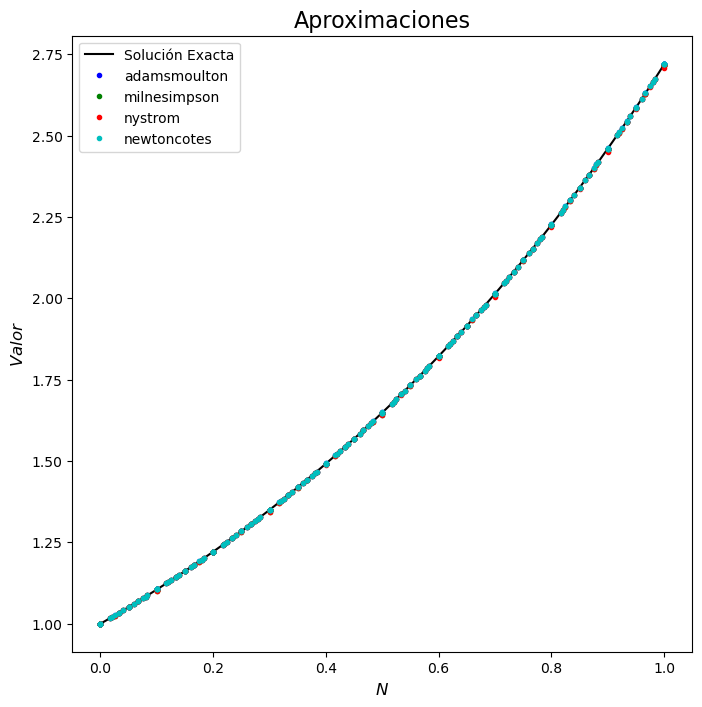

In [37]:
fig, ax = plt.subplots(figsize=(8,8))
xx = np.linspace(a,b,100)
yy = [np.exp(x) for x in xx] #la funcion es la exponencial
colors = ['b','g','r','c','m','y','C0','C1']
ax.plot(xx, yy, 'k', label="Solución Exacta")

for metodo in metodos:
    ax.plot(x[0], y[0][metodo], colors[metodos.index(metodo)]+'.', label=metodo)
    for i in range(1,6):
        ax.plot(x[i],y[i][metodo], colors[metodos.index(metodo)]+'.')

ax.legend(loc="upper left")
ax.set_xlabel("$N$", fontsize=12)
ax.set_ylabel("$Valor$", fontsize=12)
ax.set_title('Aproximaciones', fontsize=16)

Text(0.5, 1.0, 'Máximos errores absoluto')

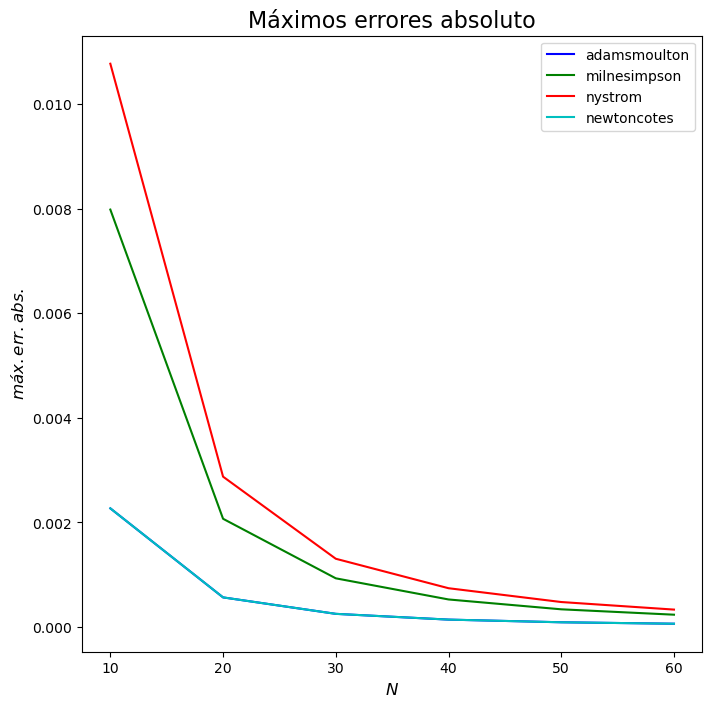

In [38]:
nv = [10 + 10*i for i in range(6)]

fig, ax = plt.subplots(figsize=(8,8))
color = "bgrcym"

for metodo in metodos:
    ax.plot(nv,[abs([np.exp(p) for p in x[i]] - y[i][metodo]).max() for i in range(6)], colors[metodos.index(metodo)], label=metodo)

ax.legend(loc="upper right")
ax.set_xlabel('$N$', fontsize=12)
ax.set_ylabel('$máx.err.abs.$', fontsize=12)
ax.set_title("Máximos errores absoluto", fontsize=16)

Text(0.5, 1.0, 'Tiempos de ejecución')

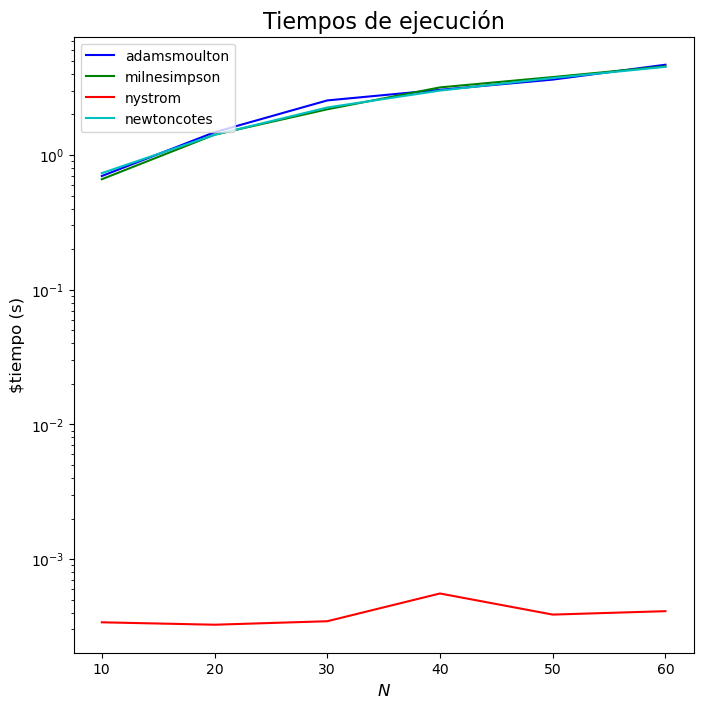

In [39]:
fig, ax = plt.subplots(figsize=(8,8))
colors = ['b','g','r','c','m','y','C0','C1']

for metodo in metodos:
    ax.plot(nv, [tiempos[i][metodo] for i in range(6)], colors[metodos.index(metodo)], label=metodo)

ax.set_yscale("log") #Usamos la escala logaritmica
ax.legend(loc="upper left")
ax.set_xlabel('$N$', fontsize=12)
ax.set_ylabel("$tiempo (s)", fontsize=12)
ax.set_title("Tiempos de ejecución", fontsize=16)

A la vista de las gráficas, Nyström es el método más rápido, mientras que Newton-Cotes es el que menos error comete

8. Intente la implementación del algoritmo de tipo Predictor-Corrector anterior, o cualquier otro adecuado, eligiendo convenientemente los otros métodos necesarios para proporcionar los valores previos necesarios.

El método predictor-corrector que vamos a implementar está compuesto por un predictor Adams-Bashforth de 3 pasos y un corrector Adam-Basforth-Moulton de 4 pasos (1 sola correción):
$$
P: \quad y_{n+3}^{(0)} = y_{n+2} + h\left(\frac{23}{12} f_{n+2} - \frac{4}{3} f_{n+1} + \frac{5}{12} f_n\right)
$$
$$
    C^1: y_{n+4} = y_{n+3} + h \left( \frac{3}{8} f(t_{n+4}, y_{n+4}^{(0)}) + \frac{19}{24}f_{n+3} - \frac{5}{24}f_{n+2} + \frac{1}{24} f_{n+1} \right)
$$

In [40]:
%%file pcabm3.py
#módulo pcabm3
''' Método predictor-corrector Adams-Bashforth-Moulton de orden 3 para resolver el PVI
    {y}'    = F(x,{y}), donde 
    {y}     = {y[0],y[1],...,y[N-1]}
    X,Y     = integrate(F,x0,y0,xfinal,N)
    x0,y0   = condiciones iniciales
    xfinal  = valor final de x
    N       = número de subintervalos de la partición
    h       = incremento de x usado en la integración
    F       = función suplida por el usuario que devuelve el  
            array F(x,y) = {y'[0],y'[1],...,y'[N-1]}
'''

def integrate(F,x0,y0,xfinal,N):
    import numpy as np
    import eulerexplicito
    
    h = (xfinal-x0)/N
    X = np.linspace(x0,xfinal,N+1)
    Y = np.zeros(N+1)
    
    # usaremos alguno de los métodos de un paso vistos anteriormente para calcular las semillas
    # en este caso volveremos a usar Euler explicito para x_1,...,x_4
    _, Y[0:3] = eulerexplicito.integrate(F,x0,y0,x0+2*h,2)
    
    K1 = F(X[1],Y[1])
    K2 = F(X[0],Y[0])
    for i in range(2,N):
        K3 = K2
        K2 = K1
        K1 = F(X[i],Y[i])
        # predictor
        Y[i+1] = Y[i] + h*(23*K1-16*K2+5*K3)/12
        K0 = F(X[i+1],Y[i+1])
        # corrector
        Y[i+1] = Y[i] + h*(9*K0+19*K1-5*K2+K3)/24
    return np.array(X),np.array(Y)

Writing pcabm3.py


Ahora vamos a comparar este método predictor-corrector con Newton-Cotes y Nyström programados en el ejercicio anterior:

In [41]:
metodos = ["newtoncotes", "nystrom", "pcabm3"]
x, y, tiempos = comparacion_metodos(metodos, 6, f, a, ya, b)

Iniciando la comparación de los siguientes métodos:
	- newtoncotes
	- nystrom
	- pcabm3


Ejecutando 6 iteraciones de valores de N...
|
├ Calculando resultados para i=0, N=10
│ ├ Finalizado el método 'newtoncotes'
│ │ Tiempo de ejecución: 0.7048445999998876
│ ├ Finalizado el método 'nystrom'
│ │ Tiempo de ejecución: 0.00019529999963197042
│ └ Finalizado el método 'pcabm3'
│   Tiempo de ejecución: 0.0006114000002526154
│
├ Calculando resultados para i=1, N=20
│ ├ Finalizado el método 'newtoncotes'
│ │ Tiempo de ejecución: 1.2904035999999905
│ ├ Finalizado el método 'nystrom'
│ │ Tiempo de ejecución: 0.0004013000002487388
│ └ Finalizado el método 'pcabm3'
│   Tiempo de ejecución: 0.0005889000003662659
│
├ Calculando resultados para i=2, N=30
│ ├ Finalizado el método 'newtoncotes'
│ │ Tiempo de ejecución: 2.1674944000001233
│ ├ Finalizado el método 'nystrom'
│ │ Tiempo de ejecución: 0.00036550000004353933
│ └ Finalizado el método 'pcabm3'
│   Tiempo de ejecución: 0.0005954000002930115
│
├

Y realizamos las 3 mismas gráficas de siempre que nos sirven para comparar:

Text(0.5, 1.0, 'Aproximaciones')

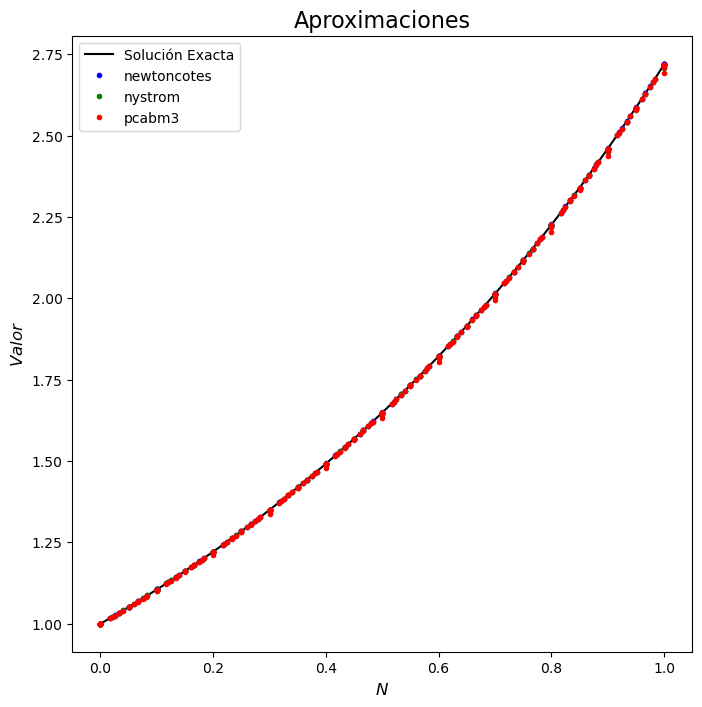

In [42]:
fig, ax = plt.subplots(figsize=(8,8))
xx = np.linspace(a,b,100)
yy = [np.exp(x) for x in xx] #la funcion es la exponencial
colors = ['b','g','r','c','m','y','C0','C1']
ax.plot(xx, yy, 'k', label="Solución Exacta")

for metodo in metodos:
    ax.plot(x[0], y[0][metodo], colors[metodos.index(metodo)]+'.', label=metodo)
    for i in range(1,6):
        ax.plot(x[i],y[i][metodo], colors[metodos.index(metodo)]+'.')

ax.legend(loc="upper left")
ax.set_xlabel("$N$", fontsize=12)
ax.set_ylabel("$Valor$", fontsize=12)
ax.set_title('Aproximaciones', fontsize=16)

Text(0.5, 1.0, 'Máximos errores absoluto')

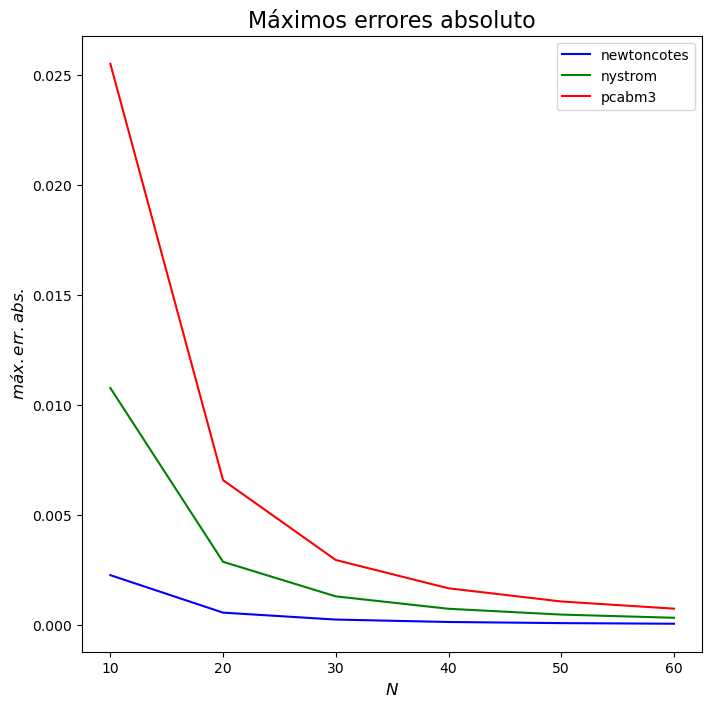

In [43]:
nv = [10 + 10*i for i in range(6)]

fig, ax = plt.subplots(figsize=(8,8))
color = "bgrcym"

for metodo in metodos:
    ax.plot(nv,[abs([np.exp(p) for p in x[i]] - y[i][metodo]).max() for i in range(6)], colors[metodos.index(metodo)], label=metodo)

ax.legend(loc="upper right")
ax.set_xlabel('$N$', fontsize=12)
ax.set_ylabel('$máx.err.abs.$', fontsize=12)
ax.set_title("Máximos errores absoluto", fontsize=16)

Text(0.5, 1.0, 'Tiempos de ejecución')

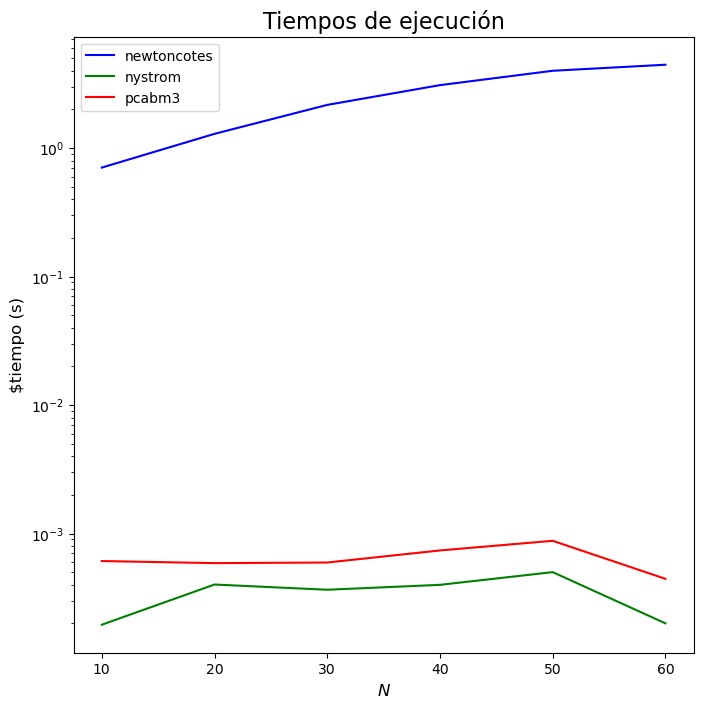

In [44]:
fig, ax = plt.subplots(figsize=(8,8))
colors = ['b','g','r','c','m','y','C0','C1']

for metodo in metodos:
    ax.plot(nv, [tiempos[i][metodo] for i in range(6)], colors[metodos.index(metodo)], label=metodo)

ax.set_yscale("log") #Usamos la escala logaritmica
ax.legend(loc="upper left")
ax.set_xlabel('$N$', fontsize=12)
ax.set_ylabel("$tiempo (s)", fontsize=12)
ax.set_title("Tiempos de ejecución", fontsize=16)

Concluimos que a pesar de ser más rápido computacionalmente que Newton-Cotes, el error que comete es mayor